# 🗺️ #30DayMapChallenge 2024 - Day 15: My Data

## ARA Libertad: Mapping My 2009 Training Voyage ⛵

### 1. Understanding Training Ships: Setting Sail for Knowledge! 🚢

#### What is a Training Ship?
* A vessel specifically designed for training future naval officers
* Combines traditional sailing techniques with modern navigation
* Serves as a floating classroom and leadership laboratory
* Builds character through hands-on experience and teamwork

#### The ARA Libertad
* **Type**: Steel-hulled, three-masted tall ship
* **Length**: 103.75 meters
* **Crew**: 24 officers, 187 crewmen, 150 cadets
* **Mission**: Training vessel for the Argentine Naval Academy
* **Maiden Voyage**: 1963
* **Recognition**: Holder of multiple speed records and prestigious awards

### 2. The Training Voyage: A Naval Tradition 🧭

#### Purpose and Significance
* **Professional Development**: Practical navigation and seamanship
* **Leadership Training**: Real-world command experience
* **Cultural Exchange**: Representing Argentina worldwide
* **Maritime Tradition**: Continuing centuries of naval education
* **Character Building**: Developing discipline and resilience

#### Training Elements
* Navigation techniques
* Ship handling
* Meteorology
* Astronomical navigation
* International maritime law
* Naval customs and traditions

### 3. Why Map a Training Voyage? 🌎

The importance of documenting this journey:
* Preserves historical significance
* Shows global maritime connections
* Illustrates naval training routes
* Captures personal milestones
* Documents port visits and cultural exchanges

### 4. Key Aspects of the Voyage 🎯

#### Route Planning
1. **Navigation Considerations**
   - Trade winds and currents
   - Port selections
   - Training requirements
   - Diplomatic missions

2. **Port Activities**
   - Official ceremonies
   - Cultural exchanges
   - Public relations
   - Training exercises

3. **Onboard Life**
   - Watch schedules
   - Training sessions
   - Ship maintenance
   - Cultural events

### 5. Map Design Elements 🎨

#### Visual Hierarchy
* Primary route in bold lines
* Port stops with distinct markers
* Training areas highlighted
* Notable events marked

#### Theme Integration
* Naval symbols and icons
* Maritime navigation elements
* Ship's crest and insignia
* Argentine naval traditions

### 6. Technical Implementation 💻


In [1]:
!pip install contextily cartopy -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 47.4 MB/s eta 0:00:00


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
from shapely.geometry import Point
import numpy as np
import cartopy.crs as ccrs
import requests
import zipfile
import io
import os

In [3]:
# Download Natural Earth data
url = "https://github.com/oechenique/30DayMapChallenge/raw/refs/heads/main/Notebooks/data/data_day7/ne_110m_admin_0_countries.zip"
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall("ne_data")
world = gpd.read_file("ne_data/ne_110m_admin_0_countries.shp")

In [4]:
!wget https://raw.githubusercontent.com/oechenique/30DayMapChallenge/refs/heads/main/Notebooks/data/data_day15/frli_2009.geojson

--2024-11-18 23:05:37--  https://raw.githubusercontent.com/oechenique/30DayMapChallenge/refs/heads/main/Notebooks/data/data_day15/frli_2009.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19036 (19K) [text/plain]
Saving to: ‘frli_2009.geojson’

frli_2009.geojson   100%[===================>]  18.59K  --.-KB/s    in 0.007s  

2024-11-18 23:05:38 (2.77 MB/s) - ‘frli_2009.geojson’ saved [19036/19036]



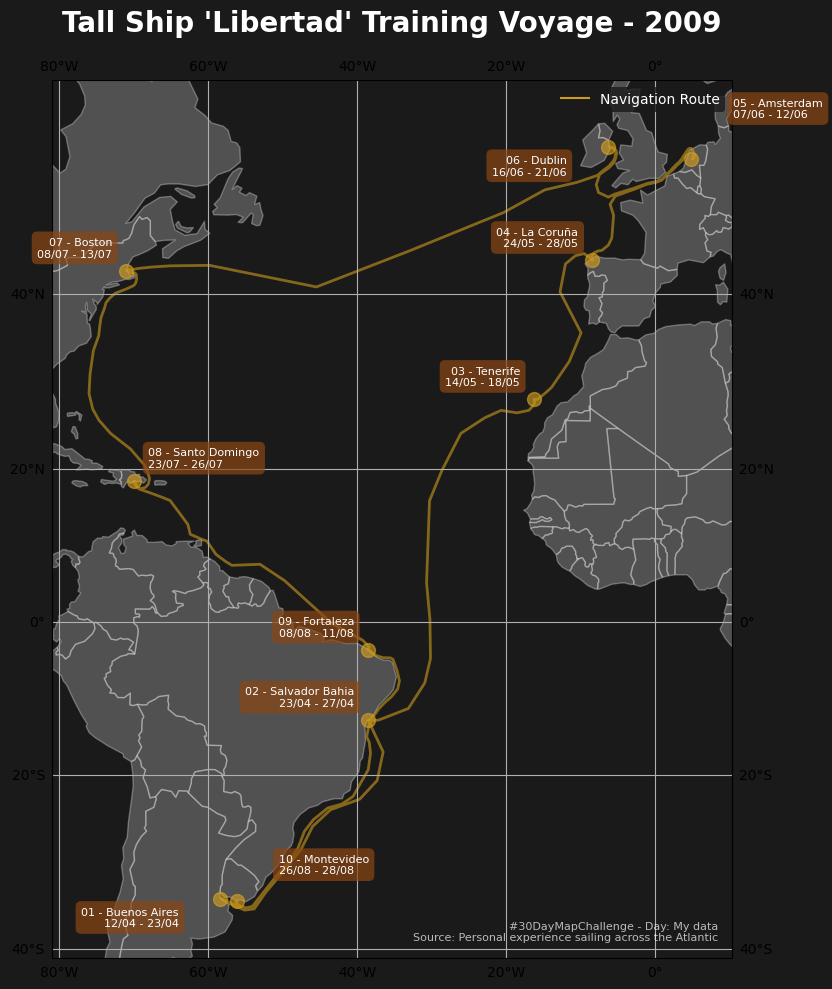

In [5]:
# Read the GeoJSON route
route_gdf = gpd.read_file('frli_2009.geojson')

# Create the ports dataframe with adjusted text positions
ports_data = {
    'name': ['Buenos Aires', 'Salvador Bahia', 'Tenerife', 'La Coruña', 'Amsterdam',
             'Dublin', 'Boston', 'Santo Domingo', 'Fortaleza', 'Montevideo'],
    'country': ['Argentina', 'Brazil', 'Spain', 'Spain', 'Netherlands',
                'Ireland', 'USA', 'Dominican Republic', 'Brazil', 'Uruguay'],
    'dates': ['12/04 - 23/04', '23/04 - 27/04', '14/05 - 18/05', '24/05 - 28/05',
              '07/06 - 12/06', '16/06 - 21/06', '08/07 - 13/07', '23/07 - 26/07',
              '08/08 - 11/08', '26/08 - 28/08'],
    'lon': [-58.3816, -38.5016, -16.2518, -8.3959, 4.9041,
            -6.2603, -71.0589, -69.9312, -38.5433, -56.1645],
    'lat': [-34.6037, -12.9716, 28.4689, 43.3708, 52.3676,
            53.3498, 42.3601, 18.4861, -3.7319, -34.9011],
    'text_offset_x': [-30, -10, -10, -10, 30,  # Buenos Aires ajustado a la izquierda
                      -30, -10, 10, -10, 30],   # Montevideo a la derecha
    'text_offset_y': [-20, 10, 10, 10, 30,
                      -20, 10, 10, 10, 20]
}

# Create GeoDataFrame for ports
geometry = [Point(xy) for xy in zip(ports_data['lon'], ports_data['lat'])]
ports_gdf = gpd.GeoDataFrame(ports_data, geometry=geometry, crs="EPSG:4326")

# Create figure with dark background
fig = plt.figure(figsize=(15, 10), facecolor='#1a1a1a')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# Set map bounds
bounds = route_gdf.total_bounds
ax.set_extent([bounds[0]-5, bounds[2]+5, bounds[1]-5, bounds[3]+5], crs=ccrs.PlateCarree())

# Plot base map
world.plot(ax=ax, color='lightgray', edgecolor='white', alpha=0.3, transform=ccrs.PlateCarree())

# Plot the actual route from GeoJSON
route_gdf.plot(ax=ax, color='#cd9b1d', linewidth=2, alpha=0.6, transform=ccrs.PlateCarree())

# Plot ports
ports_gdf.plot(ax=ax, color='goldenrod', markersize=100, alpha=0.6, transform=ccrs.PlateCarree())

# Add port labels with numbers and brown boxes
for idx, row in ports_gdf.iterrows():
    label_box = dict(
        facecolor='#8B4513',
        edgecolor='none',
        alpha=0.7,
        boxstyle='round,pad=0.5'
    )

    ax.annotate(
        f"{idx + 1:02d} - {row['name']}\n{row['dates']}",
        xy=(row.geometry.x, row.geometry.y),
        xytext=(row['text_offset_x'], row['text_offset_y']),
        textcoords="offset points",
        color='white',
        fontsize=8,
        bbox=label_box,
        ha='left' if row['text_offset_x'] > 0 else 'right',
        transform=ccrs.PlateCarree()
    )

# Customize the plot
ax.set_facecolor('#1a1a1a')

# Add single title
plt.title("Tall Ship 'Libertad' Training Voyage - 2009",
          color='white',
          size=20,
          weight='bold',
          pad=20)

# Add source text - moved to right bottom
plt.text(0.98, 0.02,
         '#30DayMapChallenge - Day: My data\nSource: Personal experience sailing across the Atlantic',
         transform=ax.transAxes,
         color='white',
         alpha=0.7,
         size=8,
         ha='right')  # Alineado a la derecha

# Add legend for the route
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='#cd9b1d', label='Navigation Route')
]
ax.legend(handles=legend_elements,
         loc='upper right',
         facecolor='#1a1a1a',
         edgecolor='none',
         labelcolor='white')

# Add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.tight_layout()
plt.show()

### 7. The Argentine Navy Connection 🇦🇷

#### Naval Education
* History of the Naval Academy
* Importance of practical training
* International cooperation
* Maritime leadership development

#### Notable Achievements
* Speed records
* International recognition
* Training excellence
* Cultural ambassadorship

### 8. Additional Resources 📚
* [ARA Libertad Official Website](https://www.argentina.gob.ar/armada/fragata-libertad)
* [Argentine Navy](https://www.argentina.gob.ar/armada)
* [Tall Ships International](https://sailtraininginternational.org/)


### 9. Personal Reflection
* The journey from cadet to officer
* Life-changing experiences
* International friendships formed
* Leadership lessons learned
* Maritime skills developed

### Fair Winds and Following Seas! ⚓
Tomorrow brings another mapping challenge, but the lessons learned aboard Libertad sail on forever!

Remember the ship's motto: "La Patria al servicio de la humanidad"
(The Nation at Humanity's Service) 🇦🇷

In [6]:
#@title Follow Me!
%%html

<div style="background: linear-gradient(90deg, #1a1a1a, #2d2d2d); color: white; padding: 2rem; border-radius: 10px; font-family: 'Roboto', sans-serif; margin-top: 2rem;">
    <h2 style="text-align: center; margin-bottom: 1rem;">
        <span style="display: block; color: white; font-size: 2.7rem; margin-bottom: 0.5rem;">ありがとうございます！</span>
        <span style="display: block; color: white; font-size: 1.8rem;">🌍 Thank you for making it this far! 🎌</span>
    </h2>

    <p style="font-size: 1.2rem; margin-bottom: 1.5rem;">If you're interested in the world of geoinformatics and want to keep learning, connect with me! | 一緒に学びましょう！</p>

    <div style="display: flex; flex-wrap: wrap; gap: 1rem; margin-bottom: 1rem;">
        <a href="https://x.com/GastonEchenique" target="_blank" style="text-decoration: none; color: white; display: flex; align-items: center; background: #1DA1F2; padding: 0.5rem 1rem; border-radius: 5px; transition: transform 0.2s;">
            <svg style="width: 24px; height: 24px; margin-right: 0.5rem;" viewBox="0 0 24 24" fill="currentColor">
                <path d="M18.244 2.25h3.308l-7.227 8.26 8.502 11.24H16.17l-5.214-6.817L4.99 21.75H1.68l7.73-8.835L1.254 2.25H8.08l4.713 6.231zm-1.161 17.52h1.833L7.084 4.126H5.117z"/>
            </svg>
            <span>@GastonEchenique</span>
        </a>

        <a href="https://www.linkedin.com/in/gaston-echenique/" target="_blank" style="text-decoration: none; color: white; display: flex; align-items: center; background: #0A66C2; padding: 0.5rem 1rem; border-radius: 5px; transition: transform 0.2s;">
            <svg style="width: 24px; height: 24px; margin-right: 0.5rem;" viewBox="0 0 24 24" fill="currentColor">
                <path d="M20.447 20.452h-3.554v-5.569c0-1.328-.027-3.037-1.852-3.037-1.853 0-2.136 1.445-2.136 2.939v5.667H9.351V9h3.414v1.561h.046c.477-.9 1.637-1.85 3.37-1.85 3.601 0 4.267 2.37 4.267 5.455v6.286zM5.337 7.433c-1.144 0-2.063-.926-2.063-2.065 0-1.138.92-2.063 2.063-2.063 1.14 0 2.064.925 2.064 2.063 0 1.139-.925 2.065-2.064 2.065zm1.782 13.019H3.555V9h3.564v11.452zM22.225 0H1.771C.792 0 0 .774 0 1.729v20.542C0 23.227.792 24 1.771 24h20.451C23.2 24 24 23.227 24 22.271V1.729C24 .774 23.2 0 22.222 0h.003z"/>
            </svg>
            <span>Gastón Echenique</span>
        </a>

        <a href="https://github.com/oechenique" target="_blank" style="text-decoration: none; color: white; display: flex; align-items: center; background: #333; padding: 0.5rem 1rem; border-radius: 5px; transition: transform 0.2s;">
            <svg style="width: 24px; height: 24px; margin-right: 0.5rem;" viewBox="0 0 24 24" fill="currentColor">
                <path d="M12 0c-6.626 0-12 5.373-12 12 0 5.302 3.438 9.8 8.207 11.387.599.111.793-.261.793-.577v-2.234c-3.338.726-4.033-1.416-4.033-1.416-.546-1.387-1.333-1.756-1.333-1.756-1.089-.745.083-.729.083-.729 1.205.084 1.839 1.237 1.839 1.237 1.07 1.834 2.807 1.304 3.492.997.107-.775.418-1.305.762-1.604-2.665-.305-5.467-1.334-5.467-5.931 0-1.311.469-2.381 1.236-3.221-.124-.303-.535-1.524.117-3.176 0 0 1.008-.322 3.301 1.23.957-.266 1.983-.399 3.003-.404 1.02.005 2.047.138 3.006.404 2.291-1.552 3.297-1.23 3.297-1.23.653 1.653.242 2.874.118 3.176.77.84 1.235 1.911 1.235 3.221 0 4.609-2.807 5.624-5.479 5.921.43.372.823 1.102.823 2.222v3.293c0 .319.192.694.801.576 4.765-1.589 8.199-6.086 8.199-11.386 0-6.627-5.373-12-12-12z"/>
            </svg>
            <span>oechenique</span>
        </a>

        <a href="https://oechenique.github.io/geoanalytics/" target="_blank" style="text-decoration: none; color: white; display: flex; align-items: center; background: #2ecc71; padding: 0.5rem 1rem; border-radius: 5px; transition: transform 0.2s;">
            <svg style="width: 24px; height: 24px; margin-right: 0.5rem;" viewBox="0 0 24 24" fill="currentColor">
                <path d="M12 0c-6.627 0-12 5.373-12 12s5.373 12 12 12 12-5.373 12-12-5.373-12-12-12zm1 16.057v-3.057h2.994c-.059 1.143-.212 2.24-.456 3.279-.823-.12-1.674-.188-2.538-.222zm1.957 2.162c-.499 1.33-1.159 2.497-1.957 3.456v-3.62c.666.028 1.319.081 1.957.164zm-1.957-7.219v-3.015c.868-.034 1.721-.103 2.548-.224.238 1.027.389 2.111.446 3.239h-2.994zm0-5.014v-3.661c.806.969 1.471 2.15 1.971 3.496-.642.084-1.3.137-1.971.165zm2.703-3.267c1.237.496 2.354 1.228 3.29 2.146-.642.234-1.311.442-2.019.607-.344-.992-.775-1.91-1.271-2.753zm-7.241 13.56c-.244-1.039-.398-2.136-.456-3.279h2.994v3.057c-.865.034-1.714.102-2.538.222zm2.538 1.776v3.62c-.798-.959-1.458-2.126-1.957-3.456.638-.083 1.291-.136 1.957-.164zm-2.994-7.055c.057-1.128.207-2.212.446-3.239.827.121 1.68.19 2.548.224v3.015h-2.994zm1.024-5.179c.5-1.346 1.165-2.527 1.97-3.496v3.661c-.671-.028-1.329-.081-1.97-.165zm-2.005-.35c-.708-.165-1.377-.373-2.018-.607.937-.918 2.053-1.65 3.29-2.146-.496.844-.927 1.762-1.272 2.753zm-.549 1.918c-.264 1.151-.434 2.36-.492 3.611h-3.933c.165-1.658.739-3.197 1.617-4.518.88.361 1.816.67 2.808.907zm.009 9.262c-.988.236-1.92.542-2.797.9-.89-1.328-1.471-2.879-1.637-4.551h3.934c.058 1.265.231 2.488.5 3.651zm.553 1.917c.342.976.768 1.881 1.257 2.712-1.223-.49-2.326-1.211-3.256-2.115.636-.229 1.299-.435 1.999-.597zm9.924 0c.7.163 1.362.367 1.999.597-.931.903-2.034 1.625-3.257 2.116.489-.832.915-1.737 1.258-2.713zm.553-1.917c.27-1.163.442-2.386.501-3.651h3.934c-.167 1.672-.748 3.223-1.638 4.551-.877-.358-1.81-.664-2.797-.9zm.501-5.651c-.058-1.251-.229-2.46-.492-3.611.992-.237 1.929-.546 2.809-.907.877 1.321 1.451 2.86 1.616 4.518h-3.933z"/>
            </svg>
            <span>GeoAnalytics</span>
        </a>

        <a href="https://discord.com/users/gastonechenique" target="_blank" style="text-decoration: none; color: white; display: flex; align-items: center; background: #5865F2; padding: 0.5rem 1rem; border-radius: 5px; transition: transform 0.2s;">
            <svg style="width: 24px; height: 24px; margin-right: 0.5rem;" viewBox="0 0 24 24" fill="currentColor">
                <path d="M20.317 4.37a19.791 19.791 0 0 0-4.885-1.515a.074.074 0 0 0-.079.037c-.21.375-.444.864-.608 1.25a18.27 18.27 0 0 0-5.487 0a12.64 12.64 0 0 0-.617-1.25a.077.077 0 0 0-.079-.037A19.736 19.736 0 0 0 3.677 4.37a.07.07 0 0 0-.032.027C.533 9.046-.32 13.58.099 18.057a.082.082 0 0 0 .031.057a19.9 19.9 0 0 0 5.993 3.03a.078.078 0 0 0 .084-.028a14.09 14.09 0 0 0 1.226-1.994a.076.076 0 0 0-.041-.106a13.107 13.107 0 0 1-1.872-.892a.077.077 0 0 1-.008-.128a10.2 10.2 0 0 0 .372-.292a.074.074 0 0 1 .077-.01c3.928 1.793 8.18 1.793 12.062 0a.074.074 0 0 1 .078.01c.12.098.246.198.373.292a.077.077 0 0 1-.006.127a12.299 12.299 0 0 1-1.873.892a.077.077 0 0 0-.041.107c.36.698.772 1.362 1.225 1.993a.076.076 0 0 0 .084.028a19.839 19.839 0 0 0 6.002-3.03a.077.077 0 0 0 .032-.054c.5-5.177-.838-9.674-3.549-13.66a.061.061 0 0 0-.031-.03zM8.02 15.33c-1.183 0-2.157-1.085-2.157-2.419c0-1.333.956-2.419 2.157-2.419c1.21 0 2.176 1.096 2.157 2.42c0 1.333-.956 2.418-2.157 2.418zm7.975 0c-1.183 0-2.157-1.085-2.157-2.419c0-1.333.955-2.419 2.157-2.419c1.21 0 2.176 1.096 2.157 2.42c0 1.333-.946 2.418-2.157 2.418z"/>
            </svg>
            <span>Gaston | ガストン</span>
        </a>
    </div>

    <p style="font-size: 1rem; color: #888;">💡 頑張りましょう！Don't miss more content about GIS, Data Science and Geoinformatics!</p>

    <div style="margin-top: 1rem; padding-top: 1rem; border-top: 1px solid #444; font-size: 0.9rem; color: #666;">
        Made with 🗺️ & 💻 by Gaston Echenique | エチェニケ・ガストン
    </div>
</div>